In [1]:
!pip install urllib3
!pip install spacy
!python3 -m spacy download en_core_web_sm
!pip install nltk
!pip install beautifulsoup4
!pip install textacy
!pip install feedparser
!pip install pyLDAvis
!pip uninstall pandas
!pip install pandas==1.3.4

     |████████████████████████████████| 12.0 MB 34.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 200 kB 39.3 MB/s 
     |████████████████████████████████| 132 kB 67.1 MB/s 
     |████████████████████████████████| 6.0 MB 50.2 MB/s 
     |████████████████████████████████| 2.0 MB 68.5 MB/s 
     |████████████████████████████████| 481 kB 56.6 MB/s 
     |████████████████████████████████| 10.1 MB 50.8 MB/s 
     |████████████████████████████████| 628 kB 53.0 MB/s 
     |████████████████████████████████| 42 kB 1.9 MB/s 
     |████████████████████████████████| 181 kB 63.3 MB/s 
     |████████████████████████████████| 451 kB 55.0 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1231111 sha256=28db34c47bcb4bf13ff1f92103d2274585c5af293f92c6a5fed8e8f9ebf4f9b5
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b5

Found existing installation: pandas 1.3.5
Uninstalling pandas-1.3.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.3.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.3.5
     |████████████████████████████████| 11.3 MB 25.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import the necessary packages
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim.corpora.dictionary import Dictionary
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
#import spacy
import string
import re
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [3]:
#Load the krebs dataset (saved as a pickle file) into a dataframe df
import pandas as pd

In [6]:
# df = df[["Title", "Abstract","Year"]]
df=pd.read_csv("/content/drive/MyDrive/CS F366/2020-dataset.csv")
df=df[["Title","Abstract","Year"]]
df1=pd.read_csv("/content/drive/MyDrive/CS F366/2021-dataset.csv")
df1=df1[["Title","Abstract","Year"]]
df=df.append(df1)
df.tail()

Title  ...  Year
1995  Taxonomy of Cybersecurity Awareness Delivery M...  ...  2021
1996  A systems engineering approach to developing a...  ...  2021
1997  Noise-response analysis of deep neural network...  ...  2021
1998  Is cyber-security the new lifeboat? An explora...  ...  2021
1999  Governing online terrorist propaganda: A socie...  ...  2021

[5 rows x 3 columns]

In [7]:
#Inspect the dataframe
print(len(df.index))


4000


In [8]:
df['Abstract']

0       The rapid increase in information in the big-d...
1       The massive growth of data that are transmitte...
2       Background: The COVID-19 pandemic is the great...
3       Internet of Things (IoT) and smart computing t...
4       Advanced manufacturing is one of the core nati...
                              ...                        
1995    Phishing is a serious threat to the Internet u...
1996    Additive manufacturing (AM), also known as thr...
1997    The ubiquity of deep neural networks (DNNs), c...
1998    After the International Maritime Organisation ...
1999    There is an increasing threat posed by terrori...
Name: Abstract, Length: 4000, dtype: object

In [9]:
#Define a function that removes urls from text using regex
def remove_urls(text):
    URLess_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    return URLess_string

In [10]:
#Define a function that removes punctuation from the text which may impact the model's ability to extract topics
def remove_punctuation(text):
    no_punct = re.sub(r'[^\w\s]', '', text)
    return no_punct

In [11]:
#Apply the remove url function to the body series
df['Abstract'] = df['Abstract'].apply(lambda x: remove_urls(x))

In [12]:
#Apply the remove punctuation function to the body series
df['Abstract'] = df['Abstract'].apply(lambda x: remove_punctuation(x))

In [13]:
print(df.head())

                                               Title  ...  Year
0  Resistive switching materials for information ...  ...  2020
1  Deep learning approaches for anomaly-based int...  ...  2020
2  Acceptability of app-based contact tracing for...  ...  2020
3  Security and Privacy in Smart Farming: Challen...  ...  2020
4  Manufacturing big data ecosystem: A systematic...  ...  2020

[5 rows x 3 columns]


Improving Interpretability using n-grams:

In [14]:
# Added on 25-11
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in df.Abstract])
# Filter only those that occur at least 10 times
finder.apply_freq_filter(10)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

In [15]:
# added on 25-11
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in df.Abstract])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(5)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)


In [16]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [17]:
trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [18]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stopwords.words('english') or bigram[1] in stopwords.words('english'):
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

In [19]:
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stopwords.words('english') or trigram[-1] in stopwords.words('english') or trigram[1] in stopwords.words('english'):
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True 

In [20]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram: bigram_filter(bigram['bigram']) and bigram.pmi > 5, axis = 1)][:500]

filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: trigram_filter(trigram['trigram']) and trigram.pmi > 5, axis = 1)][:500]


bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

In [21]:
bigrams[:10]

['substitution boxes',
 'Logistic Regression',
 'Programmable Logic',
 'Gated Recurrent',
 'Natural Language',
 'Elliptic Curve',
 'Long ShortTerm',
 'red teaming',
 'Creative Commons',
 '3D printing']

In [22]:
trigrams[:10]

['Synthetic Minority Oversampling',
 'Bidirectional Encoder Representations',
 'heat generationabsorption pulsating',
 'thermally radiative casson',
 'radiative casson fluid',
 'Analytic Hierarchy Process',
 'Programmable Logic Controllers',
 'geo polymer concrete',
 'polymer concrete cubes',
 'fly ash aggregate']

In [23]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [24]:
reviews_w_ngrams = df.copy()

In [25]:
reviews_w_ngrams.Abstract = reviews_w_ngrams.Abstract.map(lambda x: replace_ngram(x))

In [26]:
# tokenize reviews + remove stop words + remove names + remove words with less than 2 characters
# english_names not implemented
reviews_w_ngrams = reviews_w_ngrams.Abstract.map(lambda x: [word for word in x.split() if word not in stopwords.words('english') and len(word) > 2 and word not in ['cybersecurity','information','security','cyber','research','paper','study','article']])

In [27]:
reviews_w_ngrams.head()

0    [The, rapid, increase, bigdata, era, calls, ch...
1    [The, massive, growth, data, transmitted, vari...
2    [Background, The, COVID19_pandemic, greatest, ...
3    [Internet, Things, IoT, smart, computing, tech...
4    [Advanced, manufacturing, one, core, national,...
Name: Abstract, dtype: object

In [28]:
# Filter for only nouns
def noun_only(x):
    pos_comment = nltk.pos_tag(x)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    #filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered

In [29]:
final_reviews = reviews_w_ngrams.map(noun_only)
df['Abstract']=final_reviews
# final_reviews.head()
df.head()

Title  ...  Year
0  Resistive switching materials for information ...  ...  2020
1  Deep learning approaches for anomaly-based int...  ...  2020
2  Acceptability of app-based contact tracing for...  ...  2020
3  Security and Privacy in Smart Farming: Challen...  ...  2020
4  Manufacturing big data ecosystem: A systematic...  ...  2020

[5 rows x 3 columns]

In [30]:
#Define a function that takes input string, converts it all to lower case then tokenizes it using nltk.tokenize
def word_tokenizer(text):
    tokens = nltk.word_tokenize(text.lower())
    return tokens

In [31]:
df.head()

Title  ...  Year
0  Resistive switching materials for information ...  ...  2020
1  Deep learning approaches for anomaly-based int...  ...  2020
2  Acceptability of app-based contact tracing for...  ...  2020
3  Security and Privacy in Smart Farming: Challen...  ...  2020
4  Manufacturing big data ecosystem: A systematic...  ...  2020

[5 rows x 3 columns]

In [32]:
#Save the preprocessed data to a pickle file: 'df_preprocessed.pickle'
with open('df_preprocessed.pickle', 'wb') as f:
    pickle.dump(df, f)

In [ ]:
# df.index = pd.to_datetime(df.index)
#df = df.sort_index()

#df.head()

#df = df['2019-12-31':]
# print(df.size())

In [33]:
# Create a dictionary of all unique tokens by passing df.Body to the Dictionary method
df.count
dictionary = corpora.Dictionary(df.Abstract)


In [ ]:
#Each unique token is mapped to an id number e.g. 'chip': 140
#dictionary.token2id

In [34]:
#Turn the dictionary into a corpus (a Bag of Words) that contains the word id and its frequency in each document (article in our case)
texts = df.Abstract
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
# Create a dictionary of all unique tokens by passing df.Title to the Dictionary method
#dictionary_from_titles = corpora.Dictionary(df.Title)

In [ ]:
#Turn the dictionary into a corpus (a Bag of Words) that contains the word id and its frequency in each document (article in our case)
#texts_from_titles = df.Title
#corpus_from_titles = [dictionary_from_titles.doc2bow(text) for text in texts_from_titles]

In [35]:
#Create an LDA model from the Body corpus which extracts 10 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, update_every=1, chunksize=1000, passes=20, iterations=400, alpha='auto', per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [36]:
lda_model.print_topics()

[(0,
  '0.025*"system" + 0.019*"communication" + 0.018*"framework" + 0.014*"management" + 0.014*"architecture" + 0.013*"technology" + 0.013*"environment" + 0.012*"access" + 0.011*"secure" + 0.011*"infrastructure"'),
 (1,
  '0.027*"health" + 0.024*"healthcare" + 0.022*"privacy" + 0.013*"policy" + 0.012*"technology" + 0.010*"market" + 0.009*"use" + 0.009*"science" + 0.009*"certification" + 0.008*"insurance"'),
 (2,
  '0.022*"development" + 0.019*"approach" + 0.018*"level" + 0.016*"field" + 0.015*"education" + 0.015*"design" + 0.013*"game" + 0.012*"use" + 0.012*"analysis" + 0.010*"process"'),
 (3,
  '0.020*"technology" + 0.020*"business" + 0.019*"safety" + 0.015*"process" + 0.013*"management" + 0.012*"development" + 0.011*"risk" + 0.011*"survey" + 0.010*"industry" + 0.009*"analysis"'),
 (4,
  '0.018*"policy" + 0.011*"law" + 0.011*"state" + 0.010*"book" + 0.009*"government" + 0.009*"university" + 0.008*"framework" + 0.008*"defence" + 0.007*"curriculum" + 0.007*"response"'),
 (5,
  '0.048*"

In [37]:
coherence_model_lda_body = CoherenceModel(model=lda_model, texts=df.Abstract, dictionary=dictionary, coherence='c_v')
coherence_lda_body = coherence_model_lda_body.get_coherence()
print('\nCoherence score from Body: ', coherence_lda_body)


Coherence score from Body:  0.38735642504040657


In [38]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, update_every=1, chunksize=1000, passes=20, iterations=400, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        
    return model_list, coherence_values

In [39]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df.Abstract, limit=30, start=2, step=2)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

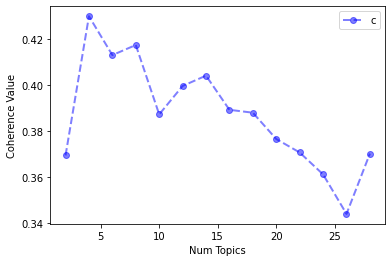

<Figure size 432x288 with 0 Axes>

In [40]:
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values, 'bo--', linewidth=2, markersize=6, alpha=0.5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Value")
plt.legend(("coherence_values"), loc='best')
#plt.title('Coherence Value as a function of topic numbers\n from Krebsonsecurity Title Corpus')
plt.show()
plt.savefig('Coherence_values')

In [41]:
 for m, cv in zip(x, coherence_values):
    print('Num Topics =', m, 'has Coherence ValueErrorlue of', round(cv,4))

Num Topics = 2 has Coherence ValueErrorlue of 0.3695
Num Topics = 4 has Coherence ValueErrorlue of 0.43
Num Topics = 6 has Coherence ValueErrorlue of 0.4131
Num Topics = 8 has Coherence ValueErrorlue of 0.4175
Num Topics = 10 has Coherence ValueErrorlue of 0.3874
Num Topics = 12 has Coherence ValueErrorlue of 0.3997
Num Topics = 14 has Coherence ValueErrorlue of 0.4042
Num Topics = 16 has Coherence ValueErrorlue of 0.3894
Num Topics = 18 has Coherence ValueErrorlue of 0.3881
Num Topics = 20 has Coherence ValueErrorlue of 0.3767
Num Topics = 22 has Coherence ValueErrorlue of 0.3708
Num Topics = 24 has Coherence ValueErrorlue of 0.3613
Num Topics = 26 has Coherence ValueErrorlue of 0.3441
Num Topics = 28 has Coherence ValueErrorlue of 0.3703


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

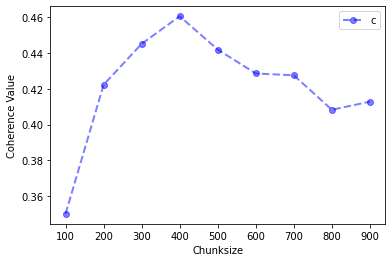

Chunksize = 100 has Coherence ValueErrorlue of 0.3499
Chunksize = 200 has Coherence ValueErrorlue of 0.4223
Chunksize = 300 has Coherence ValueErrorlue of 0.4452
Chunksize = 400 has Coherence ValueErrorlue of 0.4607
Chunksize = 500 has Coherence ValueErrorlue of 0.442
Chunksize = 600 has Coherence ValueErrorlue of 0.4286
Chunksize = 700 has Coherence ValueErrorlue of 0.4276
Chunksize = 800 has Coherence ValueErrorlue of 0.4083
Chunksize = 900 has Coherence ValueErrorlue of 0.4128


<Figure size 432x288 with 0 Axes>

In [42]:
# Chunksize
def compute_coherence_values_chunksize(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for chunksize in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, random_state=42, update_every=1, chunksize=chunksize, passes=20, iterations=400, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        
    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values_chunksize(dictionary=dictionary, corpus=corpus, texts=df.Abstract, limit=1000, start=100, step=100)
limit=1000; start=100; step=100;
x = range(start, limit, step)
plt.plot(x, coherence_values, 'bo--', linewidth=2, markersize=6, alpha=0.5)
plt.xlabel("Chunksize")
plt.ylabel("Coherence Value")
plt.legend(("coherence_values"), loc='best')
#plt.title('Coherence Value as a function of topic numbers\n from Krebsonsecurity Title Corpus')
plt.show()
plt.savefig('Coherence_values')
for m, cv in zip(x, coherence_values):
  print('Chunksize =', m, 'has Coherence ValueErrorlue of', round(cv,4))

In [43]:
# Passes
def compute_coherence_values_passes(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for passes in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, random_state=42, update_every=1, chunksize=400, passes=passes, iterations=400, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        print(passes)
    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values_passes(dictionary=dictionary, corpus=corpus, texts=df.Abstract, limit=100, start=10, step=20)
limit=100; start=10; step=20;
x = range(start, limit, step)
plt.plot(x, coherence_values, 'bo--', linewidth=2, markersize=6, alpha=0.5)
plt.xlabel("Passes")
plt.ylabel("Coherence Value")
plt.legend(("coherence_values"), loc='best')
#plt.title('Coherence Value as a function of topic numbers\n from Krebsonsecurity Title Corpus')
plt.show()
plt.savefig('Coherence_values')
for m, cv in zip(x, coherence_values):
  print('Passes =', m, 'has Coherence ValueErrorlue of', round(cv,4))

Output hidden; open in https://colab.research.google.com to view.

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

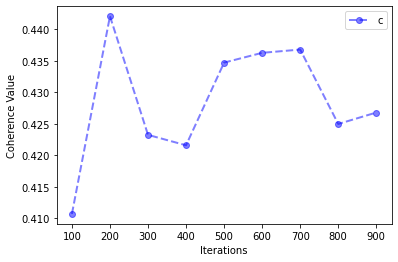

Iterations = 100 has Coherence ValueErrorlue of 0.4107
Iterations = 200 has Coherence ValueErrorlue of 0.4421
Iterations = 300 has Coherence ValueErrorlue of 0.4232
Iterations = 400 has Coherence ValueErrorlue of 0.4216
Iterations = 500 has Coherence ValueErrorlue of 0.4347
Iterations = 600 has Coherence ValueErrorlue of 0.4363
Iterations = 700 has Coherence ValueErrorlue of 0.4368
Iterations = 800 has Coherence ValueErrorlue of 0.425
Iterations = 900 has Coherence ValueErrorlue of 0.4268


<Figure size 432x288 with 0 Axes>

In [44]:
# Iterations-------Chunksize=400, passes=30
def compute_coherence_values_Iterations(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for iterations in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, random_state=42, update_every=1, chunksize=900, passes=30, iterations=iterations, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        
    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values_Iterations(dictionary=dictionary, corpus=corpus, texts=df.Abstract, limit=1000, start=100, step=100)
limit=1000; start=100; step=100;
x = range(start, limit, step)
plt.plot(x, coherence_values, 'bo--', linewidth=2, markersize=6, alpha=0.5)
plt.xlabel("Iterations")
plt.ylabel("Coherence Value")
plt.legend(("coherence_values"), loc='best')
#plt.title('Coherence Value as a function of topic numbers\n from Krebsonsecurity Title Corpus')
plt.show()
plt.savefig('Coherence_values')
for m, cv in zip(x, coherence_values):
  print('Iterations =', m, 'has Coherence ValueErrorlue of', round(cv,4))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

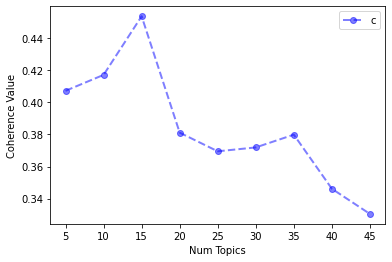

<Figure size 432x288 with 0 Axes>

In [45]:
# Final optimized value chunksize=400 passes=30 iterations=200
def compute_coherence_values_final(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, update_every=1, chunksize=900, passes=30, iterations=500, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        # print(passes)
    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values_final(dictionary=dictionary, corpus=corpus, texts=df.Abstract, limit=50, start=5, step=5)
limit=50; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values, 'bo--', linewidth=2, markersize=6, alpha=0.5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Value")
plt.legend(("coherence_values"), loc='best')
#plt.title('Coherence Value as a function of topic numbers\n from Krebsonsecurity Title Corpus')
plt.show()
plt.savefig('Coherence_values')

In [52]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=15, random_state=42, update_every=1, chunksize=400, passes=30,iterations=200, alpha='auto', per_word_topics=True)
lda_model.print_topics()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

[(0,
  '0.079*"system" + 0.039*"communication" + 0.026*"infrastructure" + 0.025*"access" + 0.023*"architecture" + 0.021*"secure" + 0.020*"platform" + 0.016*"framework" + 0.016*"environment" + 0.016*"protection"'),
 (1,
  '0.067*"privacy" + 0.051*"health" + 0.044*"healthcare" + 0.016*"science" + 0.014*"crisis" + 0.014*"care" + 0.014*"innovation" + 0.014*"cryptography" + 0.013*"period" + 0.013*"staff"'),
 (2,
  '0.035*"analysis" + 0.025*"use" + 0.025*"development" + 0.023*"technology" + 0.021*"work" + 0.020*"framework" + 0.020*"process" + 0.020*"software" + 0.019*"approach" + 0.017*"design"'),
 (3,
  '0.034*"intelligence" + 0.033*"policy" + 0.029*"ransomware" + 0.024*"regulation" + 0.024*"compliance" + 0.022*"student" + 0.017*"assess" + 0.016*"idea" + 0.015*"series" + 0.015*"threat_intelligence"'),
 (4,
  '0.058*"awareness" + 0.054*"program" + 0.040*"course" + 0.030*"web" + 0.020*"computer_science" + 0.016*"exposure" + 0.015*"online" + 0.014*"university" + 0.014*"coverage" + 0.013*"book"

In [53]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.274425  0.217364       1        1  26.828788
10    -0.268107  0.035092       2        1  19.761269
0     -0.249466 -0.231882       3        1  13.447004
9     -0.106625  0.197784       4        1   9.771564
6     -0.109815 -0.268627       5        1   5.422238
1      0.065652 -0.011209       6        1   3.670740
8      0.080714  0.037021       7        1   3.430480
3      0.096450  0.045106       8        1   2.877258
4      0.087657  0.051301       9        1   2.557982
11     0.114654  0.011624      10        1   2.300992
5      0.098268  0.005357      11        1   2.249308
7      0.106255 -0.022770      12        1   2.116857
14     0.114581 -0.044657      13        1   2.109018
12     0.121624 -0.014945      14        1   1.821498
13     0.122584 -0.006557      15        1   1.635005, topic_info=              Term         Freq        Total Category  logprob  loglift
24          system  1974.000000  1974.000000  Default  30.0000  30.0000
194          model  1400.000000  1400.000000  Default  29.0000  29.0000
350        network  1637.000000  1637.000000  Default  28.0000  28.0000
253           risk   796.000000   796.000000  Default  27.0000  27.0000
30       detection  1145.000000  1145.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
3504       college     7.198942     8.041098  Topic15  -5.5414   4.0029
3370         brief     7.139760     7.981915  Topic15  -5.5496   4.0020
2532  gamification    22.122183    34.506566  Topic15  -4.4187   3.6690
662       attacker    22.822916   108.886138  Topic15  -4.3875   2.5510
150          phase     9.964460    68.271495  Topic15  -5.2163   2.1891

[611 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
992      14  0.944264          Today
1139     12  0.957684     acceptance
550       3  0.996883         access
477       3  0.984927        account
2594      9  0.919637  accreditation
...     ...       ...            ...
811       8  0.962044      workplace
157       1  0.995339          world
1063      1  0.571922           year
1063     11  0.419409           year
1378     15  0.976034        zeroday

[710 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 11, 1, 10, 7, 2, 9, 4, 5, 12, 6, 8, 15, 13, 14])

In [ ]:
#Save the lda model from body to a pickle file
with open('lda_body.pickle', 'wb') as f:
    pickle.dump(lda_model, f)

In [54]:
# Sentence Coloring of N Sentences
print(corpus)
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        # print(model[corp])
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
df_pre=df.iloc[:6679,:]
df_post=df.iloc[6679:,:]
print(df_pre)
print(df_post)

# #Original
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc= dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Pre-covid dominant topic distribution
dominant_topic_in_each_doc_pre = df_pre.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_pre= dominant_topic_in_each_doc_pre.to_frame(name='count').reset_index()

# Post-covid dominant topic distribution
dominant_topic_in_each_doc_post = df_post.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_post= dominant_topic_in_each_doc_post.to_frame(name='count').reset_index()

# # Total Topic Distribution by actual weight Original
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
print(topic_weightage_by_doc)
# topic_weightage_by_doc.to_csv('demo.csv')
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Pre-covid total topic distribution by actual weight
topic_weightage_by_doc_pre = topic_weightage_by_doc.iloc[:6679,:]
topic_weightage_by_doc_post=topic_weightage_by_doc.iloc[6679:,:]
# print(topic_weightage_by_doc.head())
# topic_weightage_by_doc.to_csv('demo.csv')
df_topic_weightage_by_doc_pre = topic_weightage_by_doc_pre.sum().to_frame(name='count').reset_index()
df_topic_weightage_by_doc_post=topic_weightage_by_doc_post.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(23, 4), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)], [(50, 2), (51, 3), (52, 2), (53, 1), (54, 4), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 1), (63, 2), (64, 1), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 3), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 3), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1)], [(49, 2), (66, 1), (77, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 

Empty DataFrame
Columns: [Dominant_Topic, count]
Index: []
    Dominant_Topic  count
0                0    373
1                1     40
2                2   2179
3                3     25
4                4     21
5                5     18
6                6    119
7                7      8
8                8     18
9                9    164
10              10    950
11              11     14
12              12     32
13              13     25
14              14     13


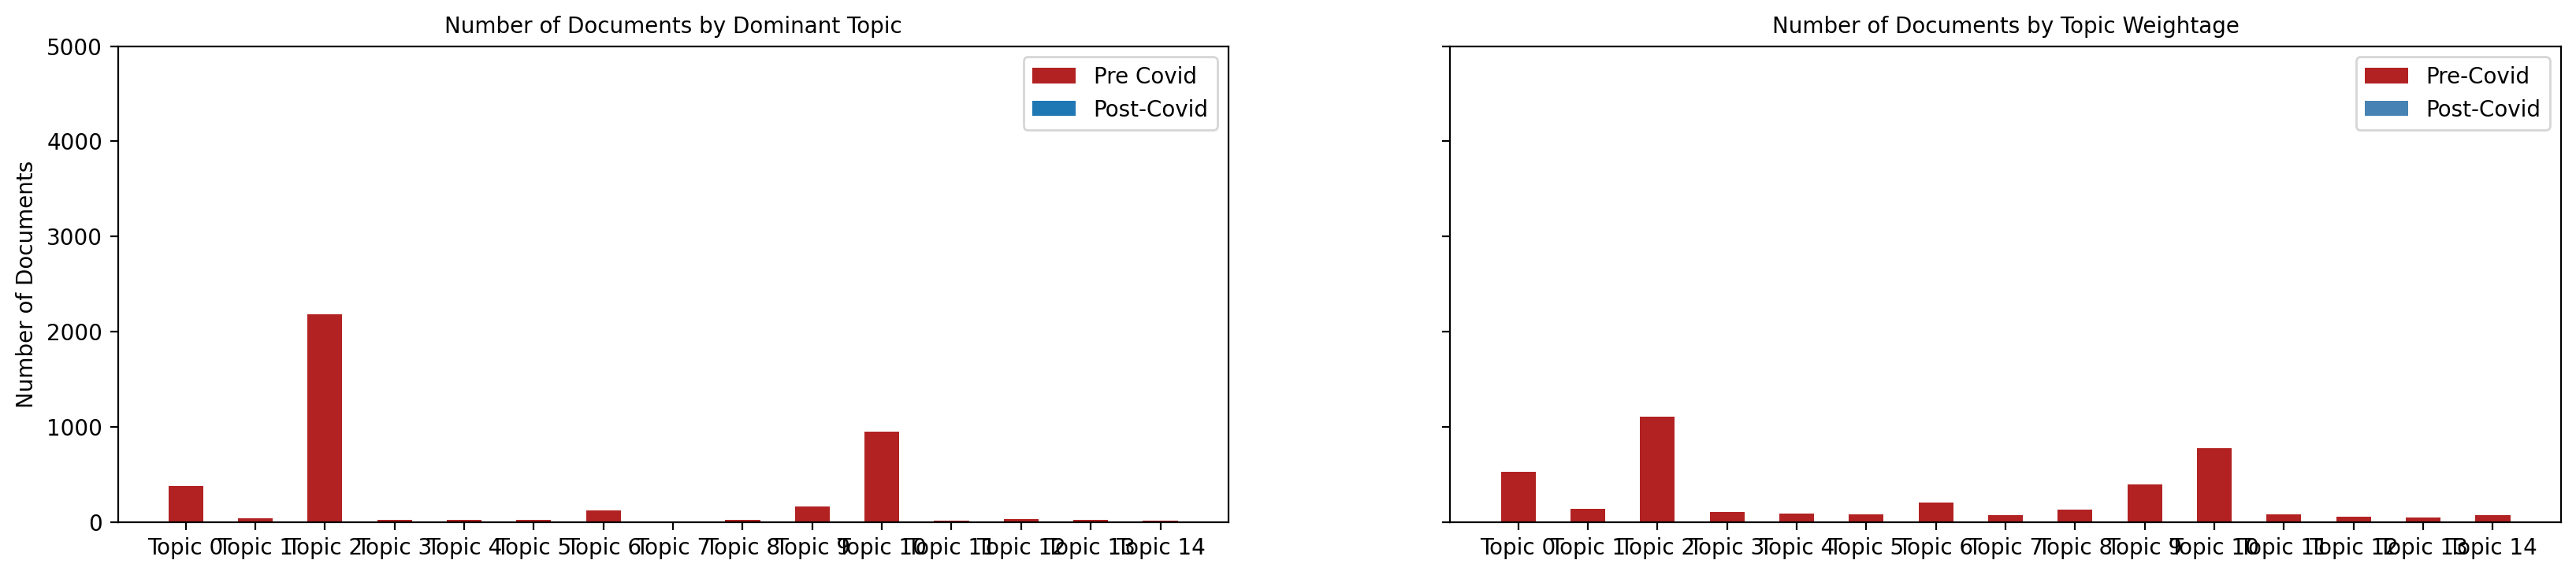

In [56]:
# Plot
from matplotlib.ticker import FuncFormatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), dpi=200, sharey=True)

# Topic Distribution by Dominant Topics

# splitting array into post and pre-covid data
# dominant_topic_data_pre=dominant_topic_in_each_doc[0:6679]
# dominant_topic_data_post=dominant_topic_in_each_doc[6679:]
print(df_dominant_topic_in_each_doc_post)
print(df_dominant_topic_in_each_doc_pre)
# print('Dominant_Topic')
num1=list(df_dominant_topic_in_each_doc_pre.index)
num2=list(df_dominant_topic_in_each_doc_post.index)
# print(num1)
# j=0
# for i in df_dominant_topic_in_each_doc_pre['count']:
#   df_dominant_topic_in_each_doc_pre['count'][j]=(int(i)/6679)*100
#   j=j+1
# j=0
# for i in df_dominant_topic_in_each_doc_post['count']:
#   df_dominant_topic_in_each_doc_post['count'][j]=(int(i)/3999)*100
#   j=j+1
# print(df_dominant_topic_in_each_doc_pre)
# print(df_dominant_topic_in_each_doc_post)
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_pre, width=.5, color='firebrick',label="Pre Covid")
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_post,width=.5, color='steelblue',label="Post-Covid")
ax1.legend()
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
# print(df_top3words.loc[df_top3words.topic_id==x, 'words'])
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x))#+ '\n'+ df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
print(tick_formatter)
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 5000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_pre, width=.5, color='firebrick',label="Pre-Covid")
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_post, width=.5, color='steelblue',label="Post-Covid")
ax2.legend()
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

[2000, 4000]
      Document_Id  Dominant_Topic
0               0               2
1               1               2
2               2               1
3               3               2
4               4               2
...           ...             ...
3994         3994              10
3995         3995               2
3996         3996               2
3997         3997              10
3998         3998               2

[3999 rows x 2 columns]
[[186, 187], [18, 22], [1078, 1101], [19, 6], [14, 7], [11, 7], [66, 53], [4, 4], [13, 5], [76, 88], [467, 483], [6, 8], [15, 17], [17, 8], [10, 3]]
[373, 40, 2179, 25, 21, 18, 119, 8, 18, 164, 950, 14, 32, 25, 13]


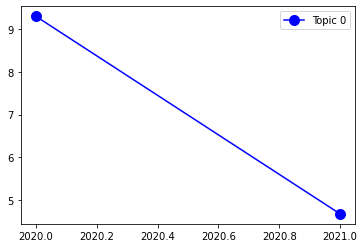

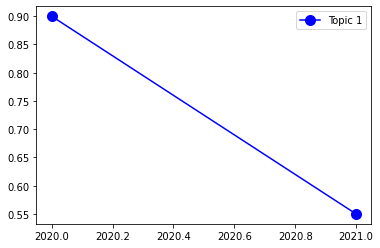

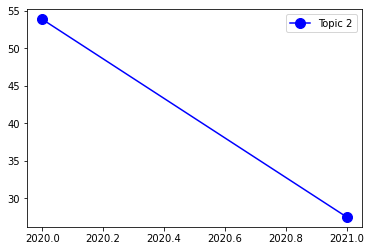

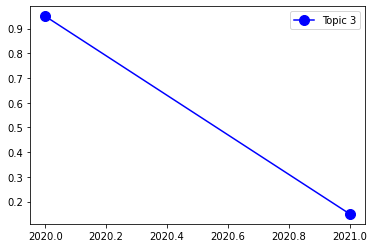

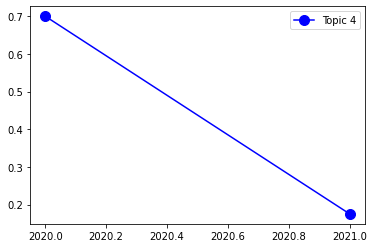

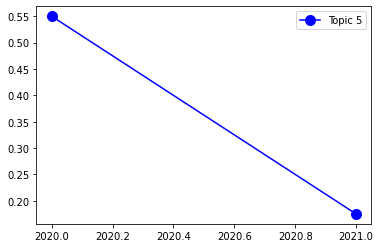

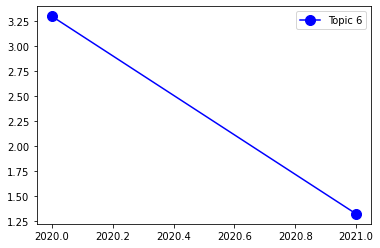

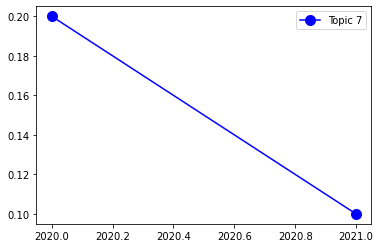

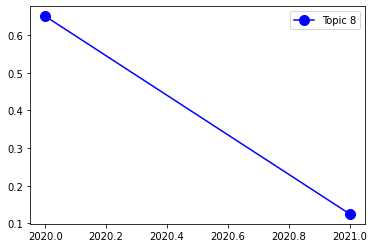

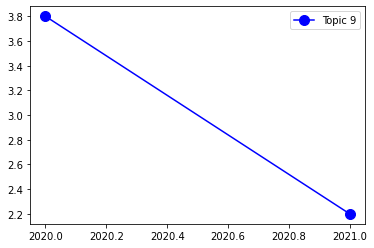

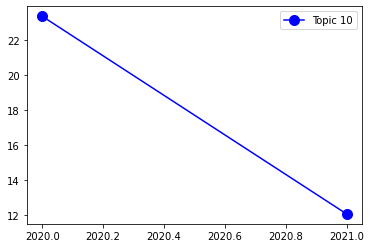

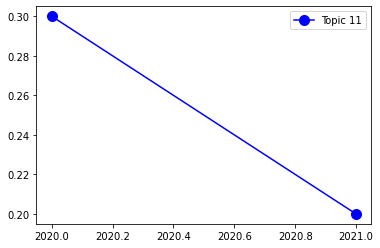

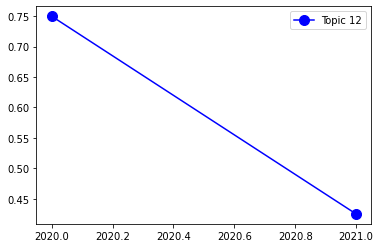

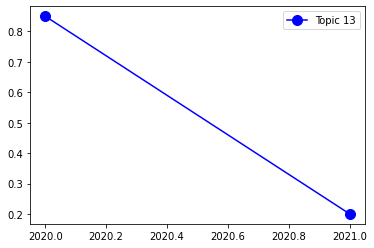

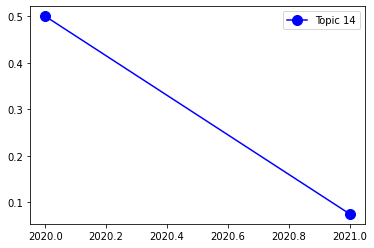

In [58]:
#  Topic wise trend analysis across years
numTopics=15
years=2
year=[2020,2021]
arr=[2000,2000]
j = 1
while j<years:
  arr[j]=arr[j]+arr[j-1]
  # print(j)
  j=j+1
print(arr)
freq=[[0]*years for _ in range(numTopics)]
j=0
print(df)
s=[0]*numTopics
for (i,j) in zip(df['Dominant_Topic'],df['Document_Id']) :
  s[i]+=1
  # print(type(i))
  if j<arr[0]:
    freq[i][0]+=1
  elif j<arr[1]:
    freq[i][1]+=1
  # elif j<arr[2]:
  #   freq[i][2]+=1
  # elif j<arr[3]:
  #   freq[i][3]+=1
  # elif j<arr[4]:
  #   freq[i][4]+=1
  # elif j<arr[5]:
  #   freq[i][5]+=1
  # elif j<arr[6]:
  #   freq[i][6]+=1
  # elif j<arr[7]:
  #   freq[i][7]+=1
  # elif j<arr[8]:
  #   freq[i][8]+=1
  # elif j<arr[9]:
  #   freq[i][9]+=1
  # elif j<arr[10]:
  #   freq[i][10]+=1
  # else:
  #   freq[i][11]=freq[i][11]+1
print(freq)
print(s)
for i in range(numTopics):
  plt.plot(year,[(k/j)*100 for (k,j) in zip(freq[i],arr)],color='blue',marker='o',markersize=10,label='Topic '+str(i))
  plt.legend()
  plt.show()
